In [5]:
#  https://www.kaggle.com/daiearth22/uniqlo-fastretailing-stock-price-prediction

In [1003]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [1013]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get the sizes
plt.rc('font',  size=20)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [1014]:
import pandas as pd

# Load the dataset
df_raw = pd.read_csv('datasets_1840_3212_Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv',header=0)


In [1015]:
df_raw.head(5)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [1016]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [1017]:
df_raw.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [1018]:
type(df_raw['Date'][0])

str

In [1019]:
from datetime import datetime
import pandas as pd


df_raw = df_raw.iloc[::-1].reset_index()
df_raw['Date'] = df_raw['Date'].apply(lambda x: pd.to_datetime(x))
df_raw.tail(20)
df = df_raw
df.tail()

,index,Date,Open,High,Low,Close,Volume,Stock Trading
1221,4,2016-12-26,43310,43660,43090,43340,358200,15547803000
1222,3,2016-12-27,43140,43700,43140,43620,400100,17427993000
1223,2,2016-12-28,43940,43970,43270,43270,339900,14780670000
1224,1,2016-12-29,43000,43220,42540,42660,448400,19188227000
1225,0,2016-12-30,42120,42330,41700,41830,610000,25628028000


In [1020]:
df.tail

<bound method NDFrame.tail of       index       Date   Open   High    Low  Close   Volume  Stock Trading
0      1225 2012-01-04  14050  14050  13700  13720   559100     7719804000
1      1224 2012-01-05  13720  13840  13600  13800   511500     7030811000
2      1223 2012-01-06  13990  14030  13790  13850   765500    10635609000
3      1222 2012-01-10  13890  14390  13860  14390   952300    13533413000
4      1221 2012-01-11  14360  14750  14280  14590  1043400    15191988000
...     ...        ...    ...    ...    ...    ...      ...            ...
1221      4 2016-12-26  43310  43660  43090  43340   358200    15547803000
1222      3 2016-12-27  43140  43700  43140  43620   400100    17427993000
1223      2 2016-12-28  43940  43970  43270  43270   339900    14780670000
1224      1 2016-12-29  43000  43220  42540  42660   448400    19188227000
1225      0 2016-12-30  42120  42330  41700  41830   610000    25628028000

[1226 rows x 8 columns]>

In [1021]:
df = df_raw['Open'].values
df = df.reshape(-1,1)

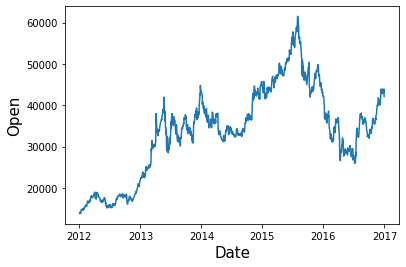

In [1022]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=df_raw['Date'], y=df_raw['Open'])
ax

In [1023]:
len(df)

1226

In [1024]:
len(df)-30

1196

In [1043]:
df_train = df[:len(df)-40]
df_test = df[len(df_train):]

In [1044]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df_train)

df_train_mms = mms.transform(df_train)
df_test_mms = mms.transform(df_test)

In [1045]:
df_train_mms[:5]
df_test_mms[:5]

array([[0.45431737],
       [0.45452645],
       [0.46623458],
       [0.48400585],
       [0.48505122]])

In [1046]:
def generator(df):
    x = []
    y = []
    for i in range(10, df.shape[0]):
        x.append(df[i-10:i, 0])
        y.append(df[i, 0])
    return x,y

In [1047]:
x_train, y_train = generator(df_train_mms)

x_train[:1]

[array([0.00689944, 0.        , 0.00564499, 0.00355425, 0.01338072,
        0.0167259 , 0.02132553, 0.01860757, 0.01923479, 0.02216182])]

In [1048]:
x_test, y_test = generator(df_test_mms)
x_test[:1]

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [1049]:
# Reshape data for LSTM Layers

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape, y_train.shape

((1176, 10, 1), (1176,))

### Model Building

In [1050]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [1115]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [1116]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [1134]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1176/1176 [==============================] - 1s 466us/step - loss: 5.2809e-04
Epoch 2/100
1176/1176 [==============================] - 1s 453us/step - loss: 5.4587e-04
Epoch 3/100
1176/1176 [==============================] - 1s 466us/step - loss: 5.6645e-04
Epoch 4/100
1176/1176 [==============================] - 1s 455us/step - loss: 5.6571e-04
Epoch 5/100
1176/1176 [==============================] - 1s 454us/step - loss: 5.3534e-04
Epoch 6/100
1176/1176 [==============================] - 1s 461us/step - loss: 5.6866e-04
Epoch 7/100
1176/1176 [==============================] - 1s 438us/step - loss: 5.5412e-04
Epoch 8/100
1176/1176 [==============================] - 1s 460us/step - loss: 5.0452e-04
Epoch 9/100
1176/1176 [==============================] - 1s 487us/step - loss: 5.1113e-04
Epoch 10/100
1176/1176 [==============================] - 1s 520us/step - loss: 5.9963e-04
Epoch 11/100
1176/1176 [==============================] - 1s 527us/step - loss: 5.3620e-04
Epoch 12

1176/1176 [==============================] - 1s 540us/step - loss: 5.2308e-04
Epoch 92/100
1176/1176 [==============================] - 1s 525us/step - loss: 5.4669e-04
Epoch 93/100
1176/1176 [==============================] - 1s 526us/step - loss: 5.1338e-04
Epoch 94/100
1176/1176 [==============================] - 1s 533us/step - loss: 5.3114e-04
Epoch 95/100
1176/1176 [==============================] - 1s 543us/step - loss: 5.4217e-04
Epoch 96/100
1176/1176 [==============================] - 1s 537us/step - loss: 4.9278e-04
Epoch 97/100
1176/1176 [==============================] - 1s 524us/step - loss: 5.4457e-04
Epoch 98/100
1176/1176 [==============================] - 1s 590us/step - loss: 6.2577e-04
Epoch 99/100
1176/1176 [==============================] - 1s 530us/step - loss: 5.5938e-04
Epoch 100/100
1176/1176 [==============================] - 1s 514us/step - loss: 5.5433e-04


In [1135]:
predictions = model.predict(x_test)
predictions = mms.inverse_transform(predictions)

In [1136]:
predictions

array([[39185.617],
       [39305.09 ],
       [40035.848],
       [40281.48 ],
       [40019.137],
       [41344.65 ],
       [41884.258],
       [41442.992],
       [40623.94 ],
       [40433.07 ],
       [40601.63 ],
       [40456.76 ],
       [40249.188],
       [40495.34 ],
       [40630.324],
       [41572.785],
       [41821.32 ],
       [44010.645],
       [43266.6  ],
       [43482.45 ],
       [43545.906],
       [43489.336],
       [42977.496],
       [43084.387],
       [44019.67 ],
       [43831.258],
       [43524.51 ],
       [43319.94 ],
       [44062.918],
       [43190.547]], dtype=float32)

In [1137]:
actual = df[len(df_train)+10:]

In [1140]:
from sklearn.metrics import mean_squared_error
from math import sqrt


rms = sqrt(mean_squared_error(actual, predictions))
rms

701.7208048405472

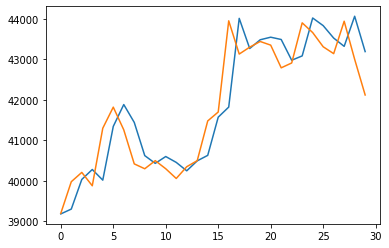

In [1139]:
plt.plot(predictions)
plt.plot(df[len(df_train)+10:])

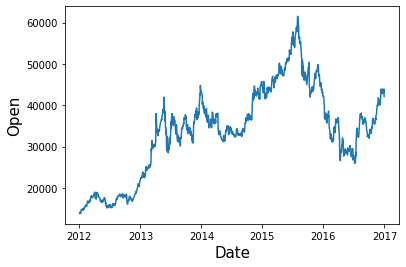

In [1080]:
sns.lineplot(x='Date',y='Open',data=df_raw)


In [1083]:
df_raw.loc[:len(df_train)+10,:]

,index,Date,Open,High,Low,Close,Volume,Stock Trading
0,1225,2012-01-04,14050,14050,13700,13720,559100,7719804000
1,1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
2,1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
3,1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
4,1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
...,...,...,...,...,...,...,...,...
1182,43,2016-10-27,36250,36370,35600,35770,426500,15291775000
1183,42,2016-10-28,36020,36450,35980,35980,454200,16400925000
1184,41,2016-10-31,35690,36030,35450,35460,344400,12260234000
1185,40,2016-11-01,35440,36050,35310,35890,366200,13093352000


In [1085]:
df_raw.loc[len(df_train)+10:,:]

,index,Date,Open,High,Low,Close,Volume,Stock Trading
1196,29,2016-11-17,39200,39710,39050,39280,573700,22579532000
1197,28,2016-11-18,39980,40620,39900,40190,886500,35703144000
1198,27,2016-11-21,40210,40270,39510,39970,609600,24304570000
1199,26,2016-11-22,39880,40360,39660,40360,500200,20073907000
1200,25,2016-11-24,41300,41760,41170,41730,692900,28790748000
1201,24,2016-11-25,41820,42020,41220,41370,665500,27635591000
1202,23,2016-11-28,41260,41440,40830,41260,384800,15844055000
1203,22,2016-11-29,40420,40580,40100,40200,894400,36013470000
1204,21,2016-11-30,40300,40340,39570,39570,692200,27596077000
1205,20,2016-12-01,40500,41190,40320,40460,850700,34630369000
